<a href="https://colab.research.google.com/github/antonisapostoloudis/3rd-Assignment-Machine-Learing/blob/main/3rd_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εργασία 3 – Συνδυασμός Μοντέλων

In [2]:
import yfinance as yf

ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)


In [3]:
df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df.head()

,Date,Open,High,Low,Close
0,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
1,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
2,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
3,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
4,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999


# 1.Δημιουργία line plot με χρήση plotly

In [4]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Open'], mode='lines', name='Open'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['High'], mode='lines', name='High'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Low'], mode='lines', name='Low'))
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close'))

fig.update_layout(title="USD Price Over Time", xaxis_title="Date", yaxis_title="Price", height=600)
fig.show()

# 2. Στατικότητα χρονοσειρών

Από το line plot που προέκυψε στις στήλες Open, High, Low και Close κατά τα τελευταία πέντε έτη, παρατηρείται ότι οι τιμές μεταβάλλονται σημαντικά με την πάροδο του χρόνου. Οι καμπύλες δεν ταλαντώνονται γύρω από έναν σταθερό μέσο όρο, αλλά παρουσιάζουν περιόδους με έντονη ανοδική ή καθοδική τάση, καθώς και μεταβαλλόμενη διακύμανση (μεγαλύτερη ή μικρότερη μεταβλητότητα σε διαφορετικές χρονικές περιόδους).

Η συμπεριφορά αυτή δείχνει ότι οι χρονοσειρές των τιμών δεν πληρούν τις προϋποθέσεις στασιμότητας, δηλαδή σταθερό μέσο όρο, σταθερή διακύμανση και σταθερή συνδιακύμανση στο χρόνο. Συνεπώς, από την οπτική ανάλυση του γραφήματος συμπεραίνεται ότι οι χρονοσειρές είναι μη στατικές (non-stationary).

# 3.Προβλήματα με εκπαίδευση Regressor πάνω σε μη στατικές χρονοσειρές

Αν ένας Regressor εκπαιδευτεί απευθείας πάνω σε μη στατικές χρονοσειρές, όπως αυτές του δείκτη USD Index (DX-Y.NYB), προκύπτουν σημαντικά προβλήματα στην αξιοπιστία και τη γενίκευση του μοντέλου. Οι τιμές του δείκτη παρουσιάζουν μακροχρόνιες τάσεις (trends), μεταβαλλόμενη διακύμανση και περιόδους έντονης ή χαμηλής μεταβλητότητας, γεγονός που σημαίνει ότι οι στατιστικές τους ιδιότητες —όπως ο μέσος όρος και η διακύμανση— δεν παραμένουν σταθερές με τον χρόνο.

Η εκπαίδευση ενός μοντέλου παλινδρόμησης πάνω σε τέτοια δεδομένα οδηγεί σε μια σειρά προβλημάτων.
1. Το μοντέλο μπορεί να μάθει μη σταθερές ή ψευδείς σχέσεις (spurious correlations) που ισχύουν μόνο σε συγκεκριμένες χρονικές περιόδους, χωρίς πραγματική αιτιώδη συσχέτιση. Για παράδειγμα, εάν ο δείκτης USD παρουσίαζε ανοδική τάση για αρκετούς μήνες, το μοντέλο ενδέχεται να «πιστέψει» ότι ο χρόνος από μόνος του προκαλεί αύξηση της τιμής, αγνοώντας τους μακροοικονομικούς παράγοντες που την επηρεάζουν.

2. Λόγω της μεταβλητότητας των δεδομένων, το μοντέλο τείνει να προσαρμόζεται υπερβολικά στα ιστορικά μοτίβα (overfitting), παρουσιάζοντας πολύ καλές επιδόσεις στο σύνολο εκπαίδευσης αλλά αποτυγχάνοντας να προβλέψει σωστά νέα δεδομένα. Επιπλέον, επειδή οι στατιστικές ιδιότητες της χρονοσειράς αλλάζουν με τον χρόνο, οι προβλέψεις του Regressor στο μέλλον καθίστανται αναξιόπιστες, καθώς βασίζονται σε υποθέσεις που δεν ισχύουν πια.

# Τάση δολαρίου μεταξύ Ιουνίου και Ιουλίου του 2025

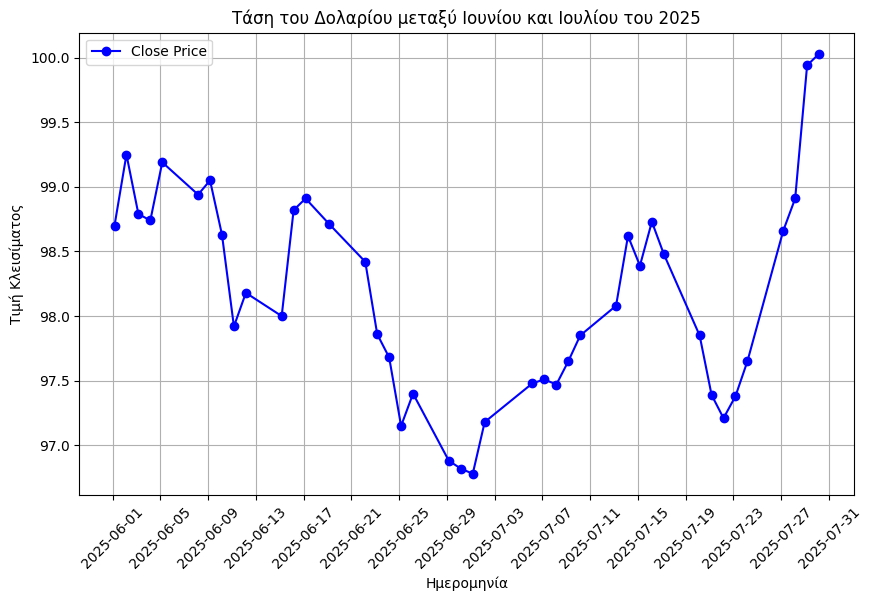

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Φιλτράρισμα τιμών για Ιούνιο και Ιούλιο 2025
june_july_2025_data = df[(df['Date'] >= '2025-06-01') & (df['Date'] <= '2025-07-31')]

# Δημιουργία διαγράμματος
plt.figure(figsize=(10, 6))
plt.plot(june_july_2025_data['Date'], june_july_2025_data['Close'], marker='o', color='b', label='Close Price')


plt.title("Τάση του Δολαρίου μεταξύ Ιουνίου και Ιουλίου του 2025")
plt.xlabel("Ημερομηνία")
plt.ylabel("Τιμή Κλεισίματος")
plt.legend()
plt.grid(True)


plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.show()

Κατά τον Ιούνιο 2025, το δολάριο υποχώρησε σημαντικά, σημειώνοντας τη χειρότερη επίδοση εξαμήνου εδώ και δεκαετίες. Οι βασικές αιτίες ήταν:

1. Προσδοκίες για μείωση επιτοκίων από τη Federal Reserve, που μείωσαν την ελκυστικότητα του USD.

2. Αύξηση του δημοσιονομικού ελλείμματος και του χρέους, που προκάλεσαν ανησυχίες για τη βιωσιμότητα των δημόσιων οικονομικών.

3. Πολιτική αβεβαιότητα και ανησυχίες για τις οικονομικές πολιτικές των ΗΠΑ.

4. Ενίσχυση άλλων νομισμάτων, όπως το ευρώ και το γεν, εις βάρος του δολαρίου.

Τον Ιούλιο 2025, το δολάριο ανέκαμψε εν μέρει λόγω:

1. Καλύτερων του αναμενόμενου οικονομικών δεδομένων, που έδειξαν ανθεκτική αμερικανική οικονομία.

2. Δηλώσεων της Fed ότι οι μειώσεις επιτοκίων ίσως καθυστερήσουν.

3. Αύξησης αποδόσεων ομολόγων, που προσέλκυσε επενδυτές πίσω στο δολάριο.

4. Γεωπολιτικών εντάσεων, που ενίσχυσαν τη ζήτηση για «ασφαλή» νομίσματα όπως το USD.

Συνολικά, η πτώση τον Ιούνιο οφειλόταν κυρίως στις αρνητικές προσδοκίες για την αμερικανική οικονομία, ενώ η ανάκαμψη τον Ιούλιο προήλθε από θετικότερα οικονομικά νέα και αλλαγή στάσης της Fed.


# 5.Πρόβλεψη τιμής open για την επόμενη μέρα

Όχι, δεν είναι δυνατόν να προβλέψουμε με ακρίβεια την τιμή Close (Ct+1) του δολαρίου μόνο από τα σημερινά Open, High, Low, Close.

Οι συναλλαγματικές ισοτιμίες είναι μη στατικές και στοχαστικές, επηρεάζονται από πολλούς εξωγενείς παράγοντες (επιτόκια, οικονομικά νέα, γεωπολιτικά γεγονότα) που δεν περιλαμβάνονται στα δεδομένα της ημέρας.
Επομένως, δεν υπάρχει σταθερή συνάρτηση


​$$ f(o_t, h_t, l_t, c_t) = c_{t+1} $$


που να περιγράφει με βεβαιότητα τη σχέση.

Μπορούμε μόνο να εκτιμήσουμε πιθανές τάσεις με στατιστικά ή μηχανικά μοντέλα (όπως ARIMA ή LSTM), όχι όμως να προβλέψουμε την ακριβή τιμή της επόμενης ημέρας.

# 6. Τυχαίος διαχωρισμός σε train και split

Δεν έχει νόημα να γίνει τυχαίος διαχωρισμός των δεδομένων σε train και test όταν πρόκειται για χρονοσειρά, όπως η τιμή του δολαρίου. Οι χρονοσειρές παρουσιάζουν χρονική εξάρτηση, δηλαδή κάθε τιμή εξαρτάται από τις προηγούμενες, οπότε αν τα δεδομένα ανακατευτούν τυχαία, το μοντέλο μπορεί να «δει» μελλοντικές τιμές κατά την εκπαίδευση, δημιουργώντας φαινόμενο διαρροής πληροφορίας (data leakage) και μη ρεαλιστικά αποτελέσματα. Για τον λόγο αυτό, ο διαχωρισμός πρέπει να γίνεται χρονικά, ώστε τα παλαιότερα δεδομένα να χρησιμοποιούνται για εκπαίδευση και τα νεότερα για έλεγχο, προσομοιώνοντας σωστά τη διαδικασία πρόβλεψης του μέλλοντος από το παρελθόν.

# 7.Διαχωρισμός δεδομένων σε train και test

In [6]:
train = df[df['Date'] < '2024-01-01']
test = df[(df['Date'] >= '2024-01-01') & (df['Date'] < '2025-01-01')]

train = train.drop(columns=['Date'])
test = test.drop(columns=['Date'])




# 8.Δημιουργία συνάρτησης που επιστρέφει timeframes και targets

In [7]:
import numpy as np

def create_timeframes(dataframe, N):
    x, y = [], []
    for i in range(len(dataframe) - N):
        x.append(dataframe.iloc[i:i+N][['Open', 'High', 'Low', 'Close']].values)
        y.append(dataframe.iloc[i+N]['Close'])
    return np.array(x), np.array(y)

# 9.Μέγεθος του timeframe ανάλογα την πρόβλεψη

Αν θέλουμε να προβλέψουμε την επόμενη ημέρα, το μέγεθος του N πρέπει να είναι μικρό (π.χ. 3-5 ημέρες), καθώς οι πιο πρόσφατες τιμές επηρεάζουν περισσότερο τη βραχυπρόθεσμη κίνηση του δολαρίου και τα παλαιότερα δεδομένα προσθέτουν θόρυβο. Αντίθετα, για προβλέψεις με πιο μακρινό ορίζοντα, όπως ένα μήνα μπροστά, το N πρέπει να είναι μεγαλύτερο (π.χ. 20-30 ημέρες), ώστε το μοντέλο να συλλάβει μακροχρόνιες τάσεις και εποχικότητα. Συνολικά, μικρό N αποτυπώνει βραχυπρόθεσμες τάσεις, ενώ μεγάλο N βοηθά στην κατανόηση μακροπρόθεσμων κύκλων, οπότε η επιλογή του εξαρτάται από τον χρονικό ορίζοντα πρόβλεψης και την πολυπλοκότητα της χρονοσειράς.

# 10. Δημιουργία train και test

In [10]:
N=5
# Δημιουργία train και test
x_train, y_train = create_timeframes(train, N)
x_test,  y_test  = create_timeframes(test, N)

# Μετατροπή σε διανύσματα Νx4
x_train = x_train.reshape(x_train.shape[0], N * 4)
x_test  = x_test.reshape(x_test.shape[0], N * 4)

# Έλεγχος ότι τα πλήθη είναι ίδια
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

# Εκτύπωση του πρώτου input του x_train
print("First input of x_train:", x_train[0])

x_train: (786, 20)
y_train: (786,)
x_test: (247, 20)
y_test: (247,)
First input of x_train: [92.56999969 92.81999969 92.18000031 92.23000336 92.23999786 92.95999908
 92.12999725 92.73000336 92.76000214 92.97000122 92.59999847 92.75
 92.69999695 93.20999908 92.61000061 93.04000092 93.01000214 93.13999939
 92.77999878 92.95999908]


# 11.Εκπαίδευση μοντέλων και υπολογισμός ακρίβειας

In [19]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd


# Linear Regressor
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred_train_lin = lin_reg.predict(x_train)
y_pred_test_lin  = lin_reg.predict(x_test)

mae_train_lin = mean_absolute_error(y_train, y_pred_train_lin)
mae_test_lin  = mean_absolute_error(y_test, y_pred_test_lin)


# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(x_train, y_train)

y_pred_train_rf = rf_reg.predict(x_train)
y_pred_test_rf  = rf_reg.predict(x_test)

mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf  = mean_absolute_error(y_test, y_pred_test_rf)

# Bagging Regressor (με Linear Regression ως estimator)
bag_reg = BaggingRegressor(
    estimator=LinearRegression(),
    n_estimators=10,
    random_state=42
)
bag_reg.fit(x_train, y_train)

y_pred_train_bag = bag_reg.predict(x_train)
y_pred_test_bag  = bag_reg.predict(x_test)

mae_train_bag = mean_absolute_error(y_train, y_pred_train_bag)
mae_test_bag  = mean_absolute_error(y_test, y_pred_test_bag)

# Stacking Regressor (Linear Regression + Decision Tree)
stack_reg = StackingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('dt', DecisionTreeRegressor(random_state=42))
    ],
    final_estimator=LinearRegression()
)
stack_reg.fit(x_train, y_train)

y_pred_train_stack = stack_reg.predict(x_train)
y_pred_test_stack  = stack_reg.predict(x_test)

mae_train_stack = mean_absolute_error(y_train, y_pred_train_stack)
mae_test_stack  = mean_absolute_error(y_test, y_pred_test_stack)

# Bayesian Linear Regression (BLR)
blr = BayesianRidge()
blr.fit(x_train, y_train)

y_pred_train_blr = blr.predict(x_train)
y_pred_test_blr  = blr.predict(x_test)

mae_train_blr = mean_absolute_error(y_train, y_pred_train_blr)
mae_test_blr  = mean_absolute_error(y_test, y_pred_test_blr)

models = ['Linear', 'Random Forest', 'BLR', 'Bagging', 'Stacking']
mae_train = [mae_train_lin, mae_train_rf, mae_train_blr, mae_train_bag, mae_train_stack]
mae_test = [mae_test_lin, mae_test_rf, mae_test_blr, mae_test_bag, mae_test_stack]


results = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Random Forest',
        'Bagging (LR)',
        'Stacking (LR + DT)',
        'Bayesian Linear Regression'
    ],
    'MAE Train': [mae_train_lin, mae_train_rf, mae_train_bag, mae_train_stack, mae_train_blr],
    'MAE Test': [mae_test_lin, mae_test_rf, mae_test_bag, mae_test_stack, mae_test_blr]
})

print(results)

                        Model  MAE Train  MAE Test
0           Linear Regression   0.345752  0.284560
1               Random Forest   0.146079  0.326098
2                Bagging (LR)   0.346398  0.286566
3          Stacking (LR + DT)   0.355035  0.287022
4  Bayesian Linear Regression   0.345667  0.284904


# Γραφική απεικόνιση των MAE

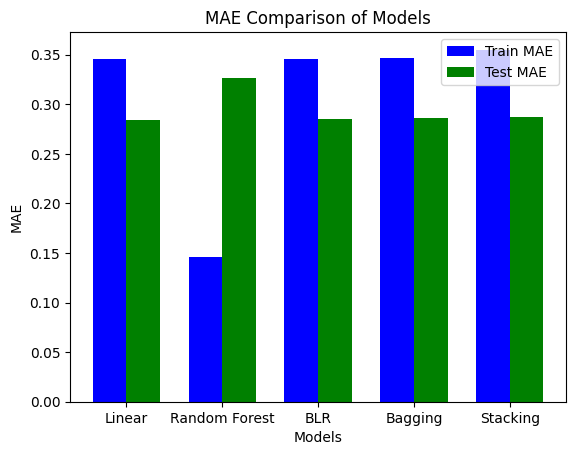

In [20]:
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, mae_train, width, label='Train MAE', color='blue')
ax.bar(x + width/2, mae_test, width, label='Test MAE', color='green')

ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_title('MAE Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()

# Εξήγηση των μοντέλων

a) Linear Regression:
Μαθαίνει μια γραμμική σχέση μεταξύ των χαρακτηριστικών και της τιμής στόχου, εκτιμώντας συντελεστές που ελαχιστοποιούν το σφάλμα.

(b) Random Forest Regressor:
Συνδυάζει πολλά δέντρα απόφασης, παίρνοντας τον μέσο των προβλέψεών τους, μειώνοντας την υπερπροσαρμογή και βελτιώνοντας την ακρίβεια.

(c) Bagging Regressor (με LR):
Εκπαιδεύει πολλαπλά μοντέλα Linear Regression σε τυχαία δείγματα των δεδομένων και συνδυάζει τις προβλέψεις τους για σταθερότητα.

(d) Stacking Regressor (LR + DT):
Συνδυάζει προβλέψεις από διαφορετικά μοντέλα (Linear Regression και Decision Tree), χρησιμοποιώντας ένα τελικό μοντέλο για βελτιωμένη απόδοση.

(e) Bayesian Linear Regression (BLR):
Εκτελεί γραμμική παλινδρόμηση αλλά με πιθανοκρατική προσέγγιση, προσθέτοντας κανονικοποίηση και αβεβαιότητα στους συντελεστές.